# <font color=red> Machine Learning Course on Coursera </font>
## Programming Exercise 2: <font color=blue>Logistic Regression</font>

In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns

In [64]:
# import of my own functions
import my_ML_functions
#set up
sigmoid = my_ML_functions.sigmoid
featuremap = my_ML_functions.featmap

## <font color=green>Regularized Logistic Regression </font>
>In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

>Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

## Let's first import the data and visualize it

In [65]:
data2=pd.read_csv('logisticReg-ex1dat2.csv',names=['Test1','Test2','Accepted'])
data2.head(5)

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


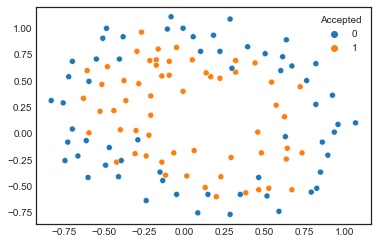

In [66]:
#Let's plot the data
sns.scatterplot(x=data2.Test1.values,y=data2.Test2.values,hue='Accepted',data=data2);

### Feature Mapping
>To improve the fitting, we will map the features into all polynomial terms of x1 and x2 up to the sixth power

In [1]:
x1 = data2.Test1.values
x2 = data2.Test2.values
fm = featuremap(x1,x2,6).T

NameError: name 'data2' is not defined

### Cost Function and Batch Gradient Descent

In [68]:
#number of trainig examples
m = np.size(data2.Test1)
n = np.shape(fm[1,:])
#n = np.shape(fm[1,:])
#print(m)
# Hypothesis function: 
#h = theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * x1X2 + theta_4 * x1^2 + theta_5 * x2^2 + ... theta_28 * x2^6
#h = g(theta.T * X) with g = 1 / (1 + exp(-theta.T * X))
theta = np.c_[np.ones(n)] # initialization of theta matrix
xMat = np.c_[fm] # initialization of the X matrix
yMat = np.c_[data2.Accepted.values] # initialization  of the y matrix
#print(theta)
#print(xMat)
#print(xMat.shape,theta.shape)

In [80]:
# Compute the Cost Function J(theta)
myLambda = 1
theta = np.c_[np.ones(n)] # initialization of theta matrix

def costfunction(X,y,theta):
    """ Calculate my cost function
    """
    h = sigmoid(np.dot(X,theta))  #  sigmoid of the h function
    part1 = y * np.log(h) # non-zero values when y equal 1
    part2 = (1 - y) * np.log(1 - h) # non-zero values when y equal 0
    J = (-1/(m))*np.sum(part1 + part2) + (myLambda/(2*m))*np.sum(np.square(theta[1:]))
    return J

# for theta = [0.0,0.0,0.0] , J = 0.693
# for theta = [1,1,1] and Lambda = 10 , J = 3.16
#print('The cost function is of',costfunction(xMat,yMat,theta))

def gradientfunction(X,y,theta):
    """ Calculate my gradient function
    """
    h = sigmoid(np.dot(X,theta))  #  sigmoid of the h function
    error = h - y
    gradient = (1/m) * (X.T @ error)
    return gradient

0 0.6049796688993199
100 0.6028644036444861
200 0.6008180515097767
300 0.5988384513934756
400 0.5969235520617984
500 0.5950714016686429
600 0.5932801386944933
700 0.5915479840926423
800 0.5898732344631302
900 0.5882542561020915


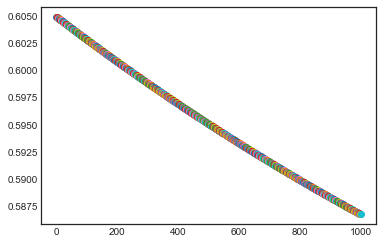

In [95]:
# Performe the batch gradient descent
#
# define the alpha parameters and number of iterations
alpha = 0.01
nIter = 1000

for i in range(nIter):
    grad = gradientfunction(xMat,yMat,theta)
    theta = theta - alpha*grad
    #print(theta)
    #
    res = costfunction(xMat,yMat,theta)
    if i%(100) == 0:
        print(i,res)   
    plt.scatter(i,res)
#print(theta.shape)

### Results of the Algorithm

In [144]:
# What is the results of your tests ?
x_test1 = 0.8
x_test2 = 0.7
x_featured_list = [1]

x_featured_list = [(x_test1 ** (i - j)) * (x_test2 ** j) for i in range(1, 7) for j in range(i + 1)]
x_featured_list.insert(0,1)
x_featured = np.array([x_featured_list]).T

#print(theta.shape,x_featured.shape)
my_result = np.sum(theta.T @ x_featured)
my_result

# accurary of trained model
pred = np.round(sigmoid(xMat @ theta))
accuracy = np.mean(pred == yMat)*100
print('The accuracy of my model is of ',accuracy,' per cent')

The accuracy of my model is of  75.42372881355932  per cent


### PLot of the boundary descision

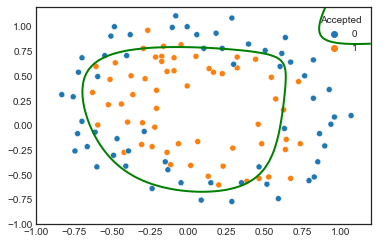

In [97]:
#Let's plot the data
sns.scatterplot(x=data2.Test1.values,y=data2.Test2.values,hue='Accepted',data=data2);
#
#Let's plot the boundary via a grid
u = np.linspace(-1, 1.2, 70)
v = np.linspace(-1, 1.2, 70)
z = np.zeros((u.size, v.size))
# Evaluate z = theta*x over the grid

for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(featuremap(ui, vj,6), theta)
z = z.T  # important to transpose z before calling contour
plt.contour(u, v, z, levels=(0), linewidths=2, colors='g');

## <font color=green>Resolution via the Scikit-learn module </font>
>In this part, the problem is the same but we use the Scikit module

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [177]:
#All parameters set to their default
model = LogisticRegression(solver='lbfgs')

In [178]:
model.fit(xMat,yMat[:,].ravel())
predicted_classes = model.predict(xMat)
accuracy = accuracy_score(yMat,predicted_classes)

In [179]:
model.intercept_, model.coef_
# accurary of trained model
print('The accuracy of my model is of ',accuracy,' per cent')

The accuracy of my model is of  0.8305084745762712  per cent


In [180]:
#Accuracy of the Model
model.score(xMat,yMat),accuracy

(0.8305084745762712, 0.8305084745762712)

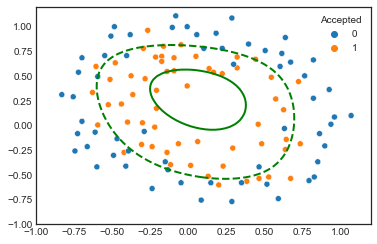

In [184]:
#Let's plot the data
sns.scatterplot(x=data2.Test1.values,y=data2.Test2.values,hue='Accepted',data=data2);
#
#Let's plot the boundary via a grid
u = np.linspace(-1, 1.2, 70)
v = np.linspace(-1, 1.2, 70)
z = np.zeros((u.size, v.size))
# Evaluate z = theta*x over the grid

for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(featuremap(ui, vj,6), model.coef_.T)
z = z.T  # important to transpose z before calling contour
plt.contour(u, v, z, levels=(-1,0),linewidths=2, colors='g');

## <font color=green>Resolution via the Scikit-learn module - methode 2 </font>
>In this part, the problem is the same but we use the Scikit module

> here we divide the data into a training and a test data sets

In [104]:
X = data2[['Test1','Test2']]
y = data2['Accepted']
#X = xMat
#y = yMat.ravel()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [105]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
predicted_classes = model.predict(X_train)
accuracy = accuracy_score(y_train,predicted_classes)
parameters = model.coef_

In [106]:
#Find out our parameters of the model and the accuracy score on the training data
parameters, accuracy

(array([[-0.44088466, -0.04116511]]), 0.5795454545454546)

In [108]:
#Find out accuracy score on the test data
model.score(X_test, y_test)

0.5

## <font color=green>Resolution via the Scipy Optimiser </font>

In [112]:
def cost_function(theta, x, y):
    h = sigmoid(x @ theta) 
    part1 = y * np.log(h)
    part2 = (1 - y) * np.log(1 - h)
    J = (-1/(m))*np.sum(part1 + part2) + (myLambda/(2*m))*np.sum(np.square(theta[1:]))
    return J

In [113]:
def gradient(theta, x, y):
    h = sigmoid(x @ theta)  #  sigmoid of the h function
    error = h - y # What goes into the sum of the cost functionJ
    #vectorization of the gradient
    out = (1/m) * (x.T @ error)
    return out

In [117]:
from scipy.optimize import fmin_tnc
n = np.shape(fm[1,:])
theta2 = np.zeros(n)
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                          fprime=gradient,args=(x,y.flatten()))
    return opt_weights[0]
parameters = fit(xMat, yMat, theta2)
parameters


array([ 1.60695763,  1.15601872,  1.9623089 , -3.05064585, -1.65703266,
       -1.91905305,  0.57021142, -0.68153502, -0.71446966,  0.04581738,
       -2.05403713, -0.19543705, -1.06003016, -0.50146833, -1.49394659,
        0.08870519, -0.37553874, -0.16212825, -0.47670422, -0.49928201,
       -0.25753075, -1.253224  ,  0.00804843, -0.51945919, -0.03978309,
       -0.54273798, -0.21843769, -0.9305075 ])

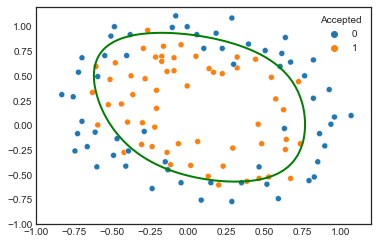

In [115]:
#Let's plot the data
sns.scatterplot(x=data2.Test1.values,y=data2.Test2.values,hue='Accepted',data=data2);
#
#Let's plot the boundary via a grid
u = np.linspace(-1, 1.2, 70)
v = np.linspace(-1, 1.2, 70)
z = np.zeros((u.size, v.size))
# Evaluate z = theta*x over the grid

for i, ui in enumerate(u):
    for j, vj in enumerate(v):
        z[i, j] = np.dot(featuremap(ui, vj,6), parameters)
z = z.T  # important to transpose z before calling contour
plt.contour(u, v, z, levels=(0),linewidths=2, colors='g');